# FaceNet_Recognition

refer to https://github.com/serengil/tensorflow-101/blob/master/python/ArcFace.ipynb 

In [155]:
import cv2
import numpy as np   
#!pip install keras tensorflow==2.4.1 mtcnn Pillow numpy opencv-python matplotlib sklearn
from keras.models import load_model
#!pip install deepface
from deepface.commons import functions, distance as dst
import matplotlib.pyplot as plt
from PIL import Image
import os

## Build Facenet Model

Downloaded FaceNet.py from the reference. (same dir)
<br> Used it with a slight modification.

In [2]:
#ref: https://github.com/serengil/deepface/blob/master/deepface/basemodels/FaceNet.py 
import facenet
#ref: https://drive.google.com/uc?id=1971Xk5RwedbudGgTIrGAL4F7Aifu7id1
model=facenet.loadModel()

facenet_weights.h5 will be downloaded...


Downloading...
From: https://drive.google.com/uc?id=1971Xk5RwedbudGgTIrGAL4F7Aifu7id1
To: C:\Users\PC921\.deepface\weights\facenet_weights.h5
92.2MB [00:02, 30.9MB/s]


## Import image

** 닮은 꼴로 유명한 김고은, 박소담 으로 test

In [156]:
img1_path = "image1.jpg"
img2_path = "image2.jpg"
img3_path = "image3.jpg"
img4_path = "image4.jpg"
img5_path = "image5.jpg"
img6_path = "image6.jpg"

김고은

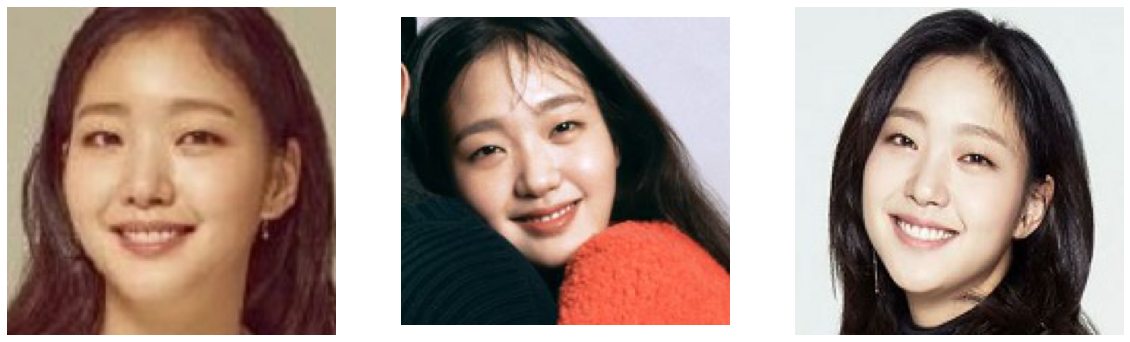

In [157]:
fig = plt.figure(figsize = (20, 20))

ax1 = fig.add_subplot(1,3,1)
plt.axis('off')
plt.imshow(Image.open(img1_path))

ax1 = fig.add_subplot(1,3,2)
plt.axis('off')
plt.imshow(Image.open(img2_path))

ax1 = fig.add_subplot(1,3,3)
plt.axis('off')
plt.imshow(Image.open(img3_path))


박소담

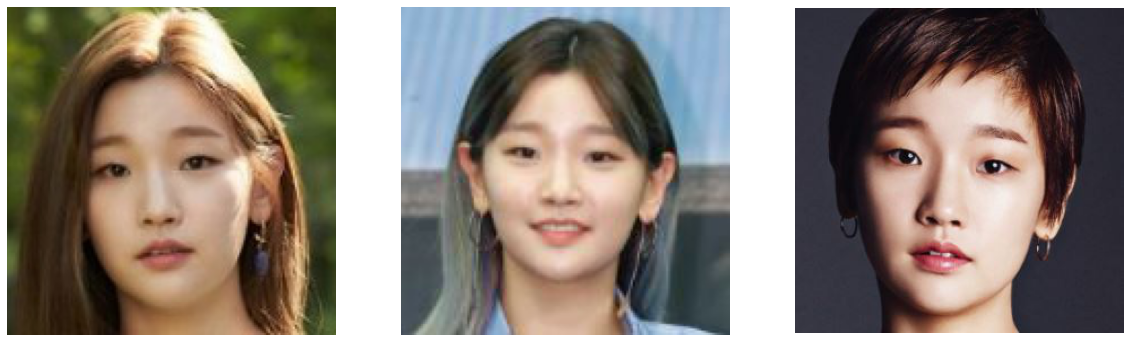

In [158]:
fig = plt.figure(figsize = (20, 20))

ax1 = fig.add_subplot(1,3,1)
plt.axis('off')
plt.imshow(Image.open(img4_path))

ax1 = fig.add_subplot(1,3,2)
plt.axis('off')
plt.imshow(Image.open(img5_path))

ax1 = fig.add_subplot(1,3,3)
plt.axis('off')
plt.imshow(Image.open(img6_path))

## Detect, Align

Facenet input size = 160 x 160 <br>
detector_backend는 opencv 사용할 예정

In [159]:
#ref: https://github.com/serengil/deepface
import detect_align

In [178]:
detector_backend = 'opencv'

detect_align.initialize_detector(detector_backend)
#detect and align 

img1 = detect_align.preprocess_face(img1_path, target_size = (160, 160), detector_backend = detector_backend)
img2 = detect_align.preprocess_face(img2_path, target_size = (160, 160), detector_backend = detector_backend)
img3 = detect_align.preprocess_face(img3_path, target_size = (160, 160), detector_backend = detector_backend)
img4 = detect_align.preprocess_face(img4_path, target_size = (160, 160), detector_backend = detector_backend)
img5 = detect_align.preprocess_face(img5_path, target_size = (160, 160), detector_backend = detector_backend)
img6 = detect_align.preprocess_face(img6_path, target_size = (160, 160), detector_backend = detector_backend)

#find vector embeddings
img1_embedding = model.predict(img1)
img2_embedding = model.predict(img2)
img3_embedding = model.predict(img3)
img4_embedding = model.predict(img4)
img5_embedding = model.predict(img5)
img6_embedding = model.predict(img6)

## Represent, Verify

#### Distance function

cosine = 0.40 ,  euclidean = 10 , euclidean_l2 = 0.80 <br>
Use cosine 사용

In [172]:
def CosineDistance(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

def EuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

def l2_normalize(x):
    return x / np.sqrt(np.sum(np.multiply(x, x)))

In [165]:
def verify(img1, img2):
    
    #representation
    
    img1_embedding = model.predict(img1)[0]
    img2_embedding = model.predict(img2)[0]
    
    distance = CosineDistance(img1_embedding, img2_embedding)
    
    #------------------------------
    #display
    
    fig = plt.figure()
    
    ax1 = fig.add_subplot(1,2,1)
    plt.axis('off')
    plt.imshow(img1[0][:,:,::-1])
    
    ax2 = fig.add_subplot(1,2,2)
    plt.axis('off')
    plt.imshow(img2[0][:,:,::-1])
    
    plt.show()
    
    #------------------------------
    #verification
    
    threshold = findThreshold(metric)
    
    if distance <= 0.40:
        print("True")
    else: 
        print("False")
    
    print("Distance = ",round(distance, 2))
    
    

## True Image

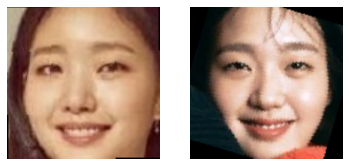

True
Distance =  0.18


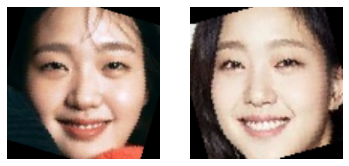

True
Distance =  0.12


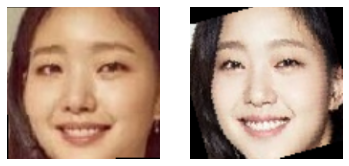

True
Distance =  0.17


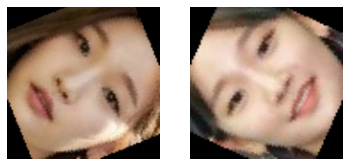

True
Distance =  0.14


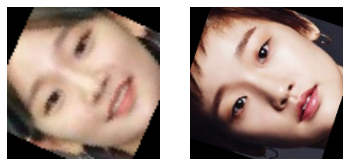

True
Distance =  0.17


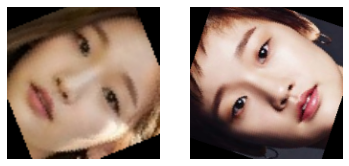

True
Distance =  0.19


In [179]:
#------------------------------
#김고은
verify(img1, img2)
verify(img2, img3)
verify(img1, img3)

#------------------------------
#박소담
verify(img4, img5)
verify(img5, img6)
verify(img4, img6)

## False Image

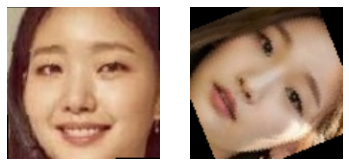

False
Distance =  0.77


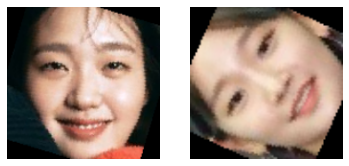

False
Distance =  0.59


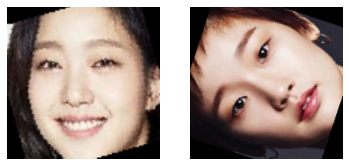

False
Distance =  0.57


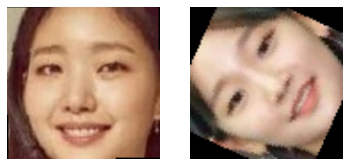

False
Distance =  0.65


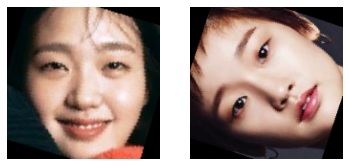

False
Distance =  0.5


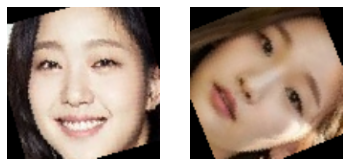

False
Distance =  0.73


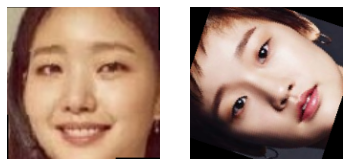

False
Distance =  0.59


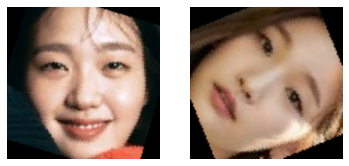

False
Distance =  0.69


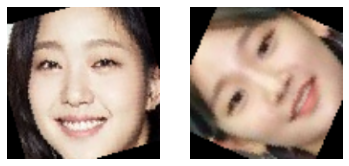

False
Distance =  0.62


In [180]:
verify(img1, img4)
verify(img2, img5)
verify(img3, img6)
verify(img1, img5)
verify(img2, img6)
verify(img3, img4)
verify(img1, img6)
verify(img2, img4)
verify(img3, img5)